In [20]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
#Hyper Parameters

input_size = 28 * 28

hidden_size = 100

num_classes = 10

num_epochs = 2

batch_size = 100

learning_rate = 0.001



sample examples shapes:  torch.Size([100, 1, 28, 28]) torch.Size([100])


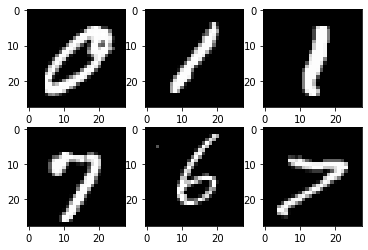

In [22]:
# Import MNIST Data

train_dataset = torchvision.datasets.MNIST(root='./datasets/mnist', 
                                           train=True, 
                                           transform= transforms.ToTensor(), 
                                           download=True
                                          )

test_dataset = torchvision.datasets.MNIST(root='.datasets/mnist', 
                                          train = True,
                                          transform = transforms.ToTensor(),
                                          download = True
                                         )


#Create DataLoader

train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                               batch_size=batch_size,
                                               shuffle=True  
                                              )

test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                               batch_size=batch_size,
                                               shuffle=True  
                                              )

#View Some Samples
examples = iter(train_dataloader)
samples, labels = examples.next()

print("sample examples shapes: ", samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()


In [23]:
#Define Neural Network

class NeuralNetMNIST(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetMNIST, self).__init__()
        
        self.l1 = nn.Linear(input_size, hidden_size)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    
    def forward(self, x):
        out = self.l1(x)
        out = self.a1(out)
        out = self.l2(out)
        return out
    
model = NeuralNetMNIST(input_size, hidden_size, num_classes).to(device)
#Loss function
criterion = nn.CrossEntropyLoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [24]:
#training Loop

for epoch in range(num_epochs):
    for i, (samples, labels) in enumerate(train_dataloader):
        #Prepare Images for Training in 1 dimentional dataset
        samples = samples.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        #compute Forward value
        y_pred = model(samples)
        
        #Compute Loss
        loss = criterion(y_pred, labels)
        
        #Backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i+1) %50 == 0:
            print(f'epoch = {epoch+1}/{num_epochs}, i={i+1}/{len(train_dataloader)}, loss = {loss:.4f}')
        
        

epoch = 1/2, i=50/600, loss = 0.7087
epoch = 1/2, i=100/600, loss = 0.4679
epoch = 1/2, i=150/600, loss = 0.2634
epoch = 1/2, i=200/600, loss = 0.2493
epoch = 1/2, i=250/600, loss = 0.3143
epoch = 1/2, i=300/600, loss = 0.2166
epoch = 1/2, i=350/600, loss = 0.3343
epoch = 1/2, i=400/600, loss = 0.1780
epoch = 1/2, i=450/600, loss = 0.1773
epoch = 1/2, i=500/600, loss = 0.2801
epoch = 1/2, i=550/600, loss = 0.1728
epoch = 1/2, i=600/600, loss = 0.2589
epoch = 2/2, i=50/600, loss = 0.1404
epoch = 2/2, i=100/600, loss = 0.3640
epoch = 2/2, i=150/600, loss = 0.2033
epoch = 2/2, i=200/600, loss = 0.1111
epoch = 2/2, i=250/600, loss = 0.1776
epoch = 2/2, i=300/600, loss = 0.1542
epoch = 2/2, i=350/600, loss = 0.2840
epoch = 2/2, i=400/600, loss = 0.1882
epoch = 2/2, i=450/600, loss = 0.2410
epoch = 2/2, i=500/600, loss = 0.2749
epoch = 2/2, i=550/600, loss = 0.2632
epoch = 2/2, i=600/600, loss = 0.0783


In [25]:
#Testing datasets

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for samples, labels in test_dataloader:
        samples = samples.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        predictions = model(samples)
        
        _, predictions = torch.max(predictions, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy: {acc:.4f}%')


accuracy: 95.5833%
